In [133]:
import numpy as np
import matplotlib.pyplot as plt


def pp(z, alpha, beta, delta, gamma):
    '''
    Predator-Prey Model
    (Lotka-Voltera Eqation)
    
    dz = [[x],   <---- z[0]
         [y]]   <---- z[1]
         
    dz0 = dx/dt = alpha*x*y - beta*x*y
    dz1 = dy/dt = delta*x*y - gamma*y
    '''
    dz = np.zeros(2)
    dz[0] = alpha * z[0] - beta * z[0] * z[1]
#     dz[0] = k*z[0]*(1-z[0]/a) - beta * z[0] * z[1]
    dz[1] = delta * z[0] * z[1] - gamma * z[1]
    
    return dz


# Initial Values

x0 = 10
y0 = 10

# Parameters

alpha = 0.01
beta = 0.005
delta = 0.02
gamma = 0.07

k = 0.1
a = 45



# RK4 Method
timestop = 1500
sol = np.array([x0, y0])
timelist = [0]
t = 0
h = 0.25
while t <= timestop:
    
    if np.size(sol) > 2:
        sol_now = sol[-1,:]
    else:
        sol_now = sol
        
    k1 = pp(sol_now, alpha, beta, delta, gamma)
    k2 = pp(sol_now + h*k1/2, alpha, beta, delta, gamma)
    k3 = pp(sol_now + h*k2/2, alpha, beta, delta, gamma)
    k4 = pp(sol_now + h*k3, alpha, beta, delta, gamma)
    sol_new = sol_now + (1/6)*h*(k1 + 2*k2 + 2*k3 + k4)
    t = t + h
    timelist.append(t)
    sol = np.vstack((sol, sol_new))
 

# Numerical solution here
x = sol[:, 0]
y = sol[:, 1]


In [134]:
sol

array([[1.00000000e+01, 1.00000000e+01],
       [9.89847619e+00, 1.03277304e+01],
       [9.79393758e+00, 1.06607080e+01],
       ...,
       [2.51234639e+00, 3.34464657e-04],
       [2.51863406e+00, 3.32822282e-04],
       [2.52493747e+00, 3.31198397e-04]])

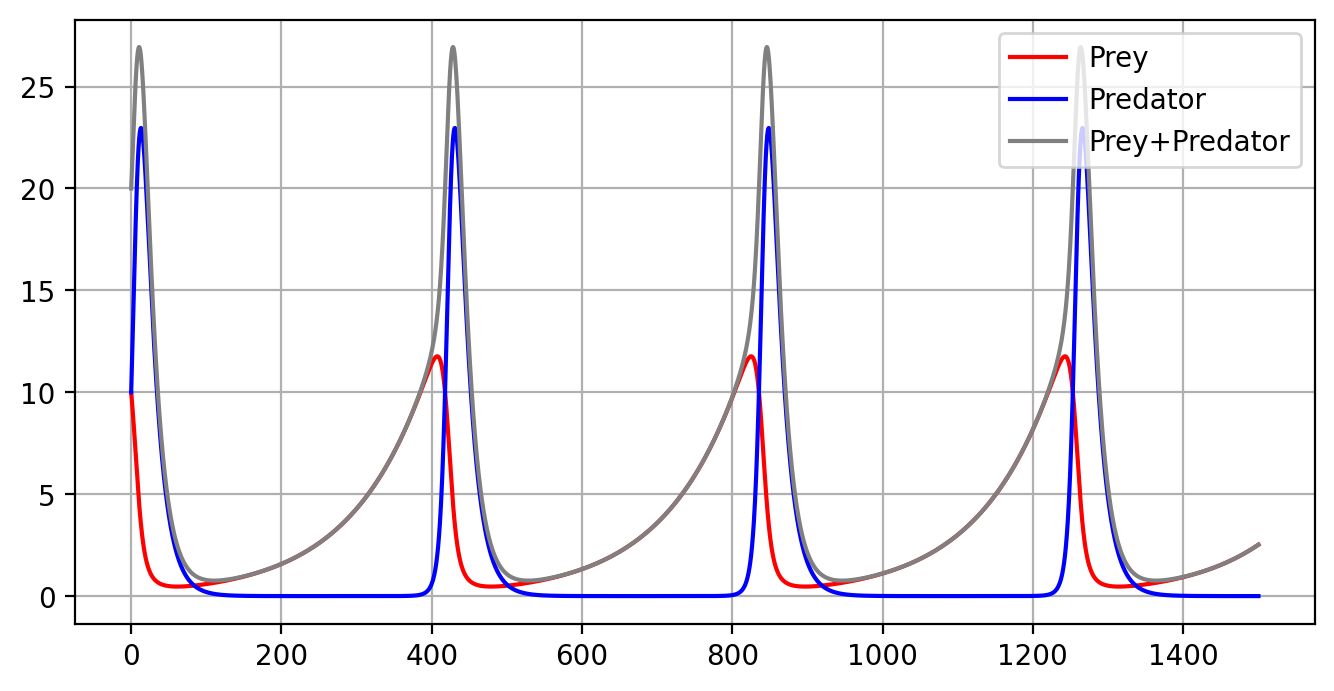

In [135]:
plt.figure(figsize=(8,4), dpi=200)
plt.plot(timelist, x, color='red', label='Prey')
plt.plot(timelist, y, color='blue', label='Predator')
plt.plot(timelist, x+y, color='gray', label='Prey+Predator')
plt.legend(loc='upper right')
plt.grid()